In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [101]:
df = pd.read_csv('spotify_songs.csv')
df.dropna(inplace=True)
df.drop(columns=['track_id','track_album_id','playlist_id'],axis=1,inplace=True)
categorical_columns = ['track_name', 'track_artist', 'track_album_name','track_album_release_date','playlist_name', 'playlist_genre', 'playlist_subgenre']



In [102]:
# categorical_columns = ['track_id','track_album_id','playlist_id','track_name', 'track_artist', 'track_album_name','track_album_release_date', 'playlist_name', 'playlist_genre', 'playlist_subgenre']



# Apply Label Encoding for each categorical feature
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [103]:
X = df.drop('playlist_genre', axis=1) 
col=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(X,columns=col) # Independent variables (features)
y = df['playlist_genre'] 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


In [105]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"MAE is :{mae}")
print(f"R2 is :{r2}")

MAE is :0.029241547365214744
R2 is :0.9762475748798152


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [107]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.01489447, 0.01682641, 0.02977251, 0.01496092, 0.08604056,
       0.11619638, 0.37305713, 0.04514344, 0.03714705, 0.0091488 ,
       0.02518384, 0.00300799, 0.05142851, 0.03258084, 0.03062987,
       0.01512218, 0.02685538, 0.04479146, 0.02721226])

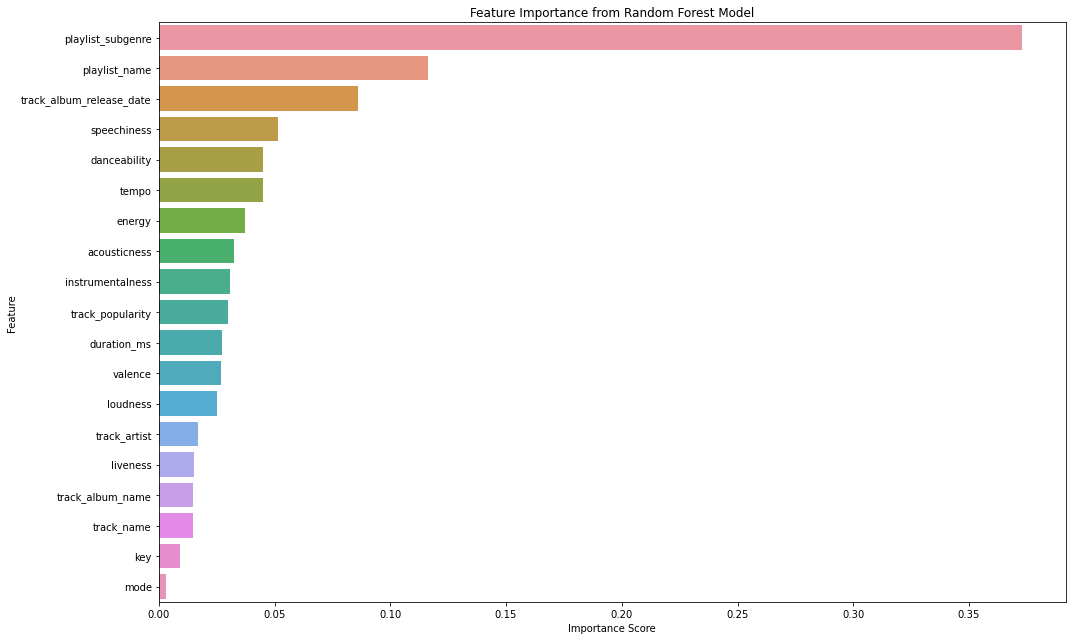

In [108]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance using a bar plot
plt.figure(figsize=(15, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, )
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()